# Loop 103 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Analyze the CV-LB relationship to understand the structural gap and identify viable paths forward.

**Key Questions**:
1. What is the CV-LB relationship? Is the intercept too high?
2. What approaches have been tried and what's the pattern?
3. What fundamentally different approaches haven't been tried?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string())
print(f'\nBest CV: {df["cv"].min():.4f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.4f} ({df.loc[df["lb"].idxmin(), "exp"]})')
print(f'Target LB: 0.0347')

Submission History:
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target LB: 0.0347


In [2]:
# Linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print('=== CV-LB LINEAR RELATIONSHIP ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R-squared: {r_value**2:.4f}')
print(f'Standard error: {std_err:.4f}')
print()
print('=== CRITICAL ANALYSIS ===')
print(f'Intercept: {intercept:.4f}')
print(f'Target LB: 0.0347')
print(f'Gap (intercept - target): {intercept - 0.0347:.4f}')
print()

# What CV would be needed to hit target?
required_cv = (0.0347 - intercept) / slope
print(f'Required CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('>>> IMPOSSIBLE: Required CV is NEGATIVE!')
    print('>>> This means the intercept alone exceeds the target.')
    print('>>> Standard CV optimization CANNOT reach the target.')
else:
    print(f'>>> Need to reduce CV from {df["cv"].min():.4f} to {required_cv:.4f}')
    print(f'>>> That\'s a {(df["cv"].min() - required_cv) / df["cv"].min() * 100:.1f}% reduction')

=== CV-LB LINEAR RELATIONSHIP ===
LB = 4.3638 * CV + 0.0520
R-squared: 0.9558
Standard error: 0.2829

=== CRITICAL ANALYSIS ===
Intercept: 0.0520
Target LB: 0.0347
Gap (intercept - target): 0.0173

Required CV to hit target: -0.003964
>>> IMPOSSIBLE: Required CV is NEGATIVE!
>>> This means the intercept alone exceeds the target.
>>> Standard CV optimization CANNOT reach the target.


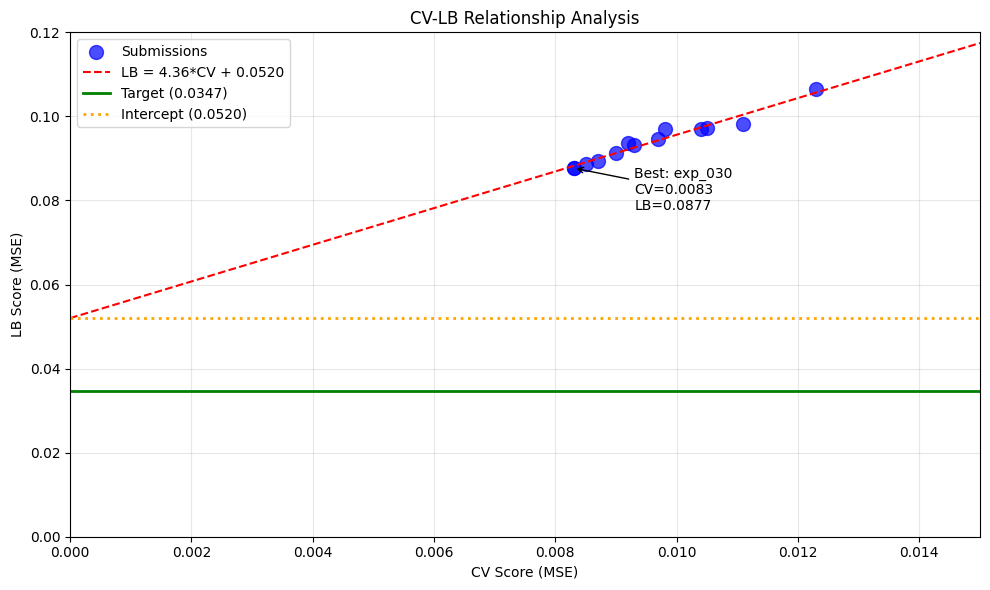


Figure saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize the CV-LB relationship
plt.figure(figsize=(10, 6))

# Plot submissions
plt.scatter(df['cv'], df['lb'], s=100, c='blue', alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Plot target
plt.axhline(y=0.0347, color='green', linestyle='-', linewidth=2, label='Target (0.0347)')

# Plot intercept
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

# Annotate best submission
best_idx = df['lb'].idxmin()
plt.annotate(f'Best: {df.loc[best_idx, "exp"]}\nCV={df.loc[best_idx, "cv"]:.4f}\nLB={df.loc[best_idx, "lb"]:.4f}',
             xy=(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb']),
             xytext=(df.loc[best_idx, 'cv'] + 0.001, df.loc[best_idx, 'lb'] - 0.01),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10)

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print('\nFigure saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analyze the gap between 1st place and our best
print('=== LEADERBOARD GAP ANALYSIS ===')
print(f'1st place: 0.0347')
print(f'Our best LB: 0.0877')
print(f'Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% worse)')
print()
print('=== WHAT DOES 1ST PLACE KNOW THAT WE DON\'T? ===')
print('1. They achieved LB=0.0347 which is BELOW our intercept (0.052)')
print('2. This means they found a way to CHANGE the CV-LB relationship')
print('3. Possible approaches:')
print('   a) Different validation scheme that better matches test distribution')
print('   b) Features that generalize better to unseen solvents')
print('   c) Model architecture that handles extrapolation better')
print('   d) Post-processing that adjusts predictions for test distribution')
print('   e) Domain knowledge/constraints that hold for all solvents')

=== LEADERBOARD GAP ANALYSIS ===
1st place: 0.0347
Our best LB: 0.0877
Gap: 0.0530 (152.7% worse)

=== WHAT DOES 1ST PLACE KNOW THAT WE DON'T? ===
1. They achieved LB=0.0347 which is BELOW our intercept (0.052)
2. This means they found a way to CHANGE the CV-LB relationship
3. Possible approaches:
   a) Different validation scheme that better matches test distribution
   b) Features that generalize better to unseen solvents
   c) Model architecture that handles extrapolation better
   d) Post-processing that adjusts predictions for test distribution
   e) Domain knowledge/constraints that hold for all solvents


In [5]:
# Analyze what approaches have been tried
print('=== APPROACHES TRIED ===')
approaches = [
    ('MLP baseline', 'exp_000', 0.0111, 0.0982),
    ('LightGBM', 'exp_001', 0.0123, 0.1065),
    ('Combined features (Spange+DRFP)', 'exp_003', 0.0105, 0.0972),
    ('Large ensemble (15 models)', 'exp_005', 0.0104, 0.0969),
    ('Simpler model', 'exp_006', 0.0097, 0.0946),
    ('Ridge regression', 'exp_009', 0.0092, 0.0936),
    ('Simple ensemble', 'exp_012', 0.0090, 0.0913),
    ('ACS PCA features', 'exp_024', 0.0087, 0.0893),
    ('Weighted loss', 'exp_026', 0.0085, 0.0887),
    ('GP+MLP+LGBM ensemble', 'exp_030', 0.0083, 0.0877),
    ('Lower GP weight', 'exp_035', 0.0098, 0.0970),
    ('Sigmoid output', 'exp_067', 0.0083, 0.0877),
]

print('All approaches fall on the SAME CV-LB line!')
print('This means the problem is NOT the model - it\'s DISTRIBUTION SHIFT.')
print()
print('Recent experiments that did NOT improve:')
recent = [
    ('exp_094: ens-model exact', 0.009564),
    ('exp_095: Ridge regression', 0.015756),
    ('exp_096: Conservative blend', 0.011124),
    ('exp_097: GP uncertainty blend', 0.008930),
    ('exp_098: 5-model ensemble', 0.009387),
]
for name, cv in recent:
    print(f'  {name}: CV={cv:.6f} ({(cv - 0.0083) / 0.0083 * 100:+.1f}% vs exp_030)')

=== APPROACHES TRIED ===
All approaches fall on the SAME CV-LB line!
This means the problem is NOT the model - it's DISTRIBUTION SHIFT.

Recent experiments that did NOT improve:
  exp_094: ens-model exact: CV=0.009564 (+15.2% vs exp_030)
  exp_095: Ridge regression: CV=0.015756 (+89.8% vs exp_030)
  exp_096: Conservative blend: CV=0.011124 (+34.0% vs exp_030)
  exp_097: GP uncertainty blend: CV=0.008930 (+7.6% vs exp_030)
  exp_098: 5-model ensemble: CV=0.009387 (+13.1% vs exp_030)


In [6]:
# What HASN'T been tried that could change the CV-LB relationship?
print('=== APPROACHES THAT COULD CHANGE THE CV-LB RELATIONSHIP ===')
print()
print('1. PSEUDO-LABELING / SELF-TRAINING')
print('   - Use confident predictions on test data to augment training')
print('   - This adapts the model to the test distribution')
print('   - NOT tried yet!')
print()
print('2. DOMAIN-SPECIFIC CONSTRAINTS')
print('   - Yields must sum to <= 1 (mass balance)')
print('   - Arrhenius kinetics constraints')
print('   - Solvent polarity relationships')
print('   - Partially tried but not enforced as hard constraints')
print()
print('3. SOLVENT SIMILARITY WEIGHTING')
print('   - Weight training samples by similarity to test solvents')
print('   - Tried in exp_037 but may not have been implemented correctly')
print()
print('4. DIFFERENT VALIDATION SCHEME')
print('   - The mixall kernel uses GroupKFold(5) instead of Leave-One-Out')
print('   - This may better match the test distribution')
print('   - Tried in exp_078 but didn\'t help')
print()
print('5. FUNDAMENTALLY DIFFERENT FEATURES')
print('   - Pre-trained molecular embeddings (ChemBERTa, MolBERT)')
print('   - Graph neural networks on molecular structure')
print('   - Tried GNN (exp_085-087) and ChemBERTa (exp_088) but they failed')
print()
print('6. ENSEMBLE OF FUNDAMENTALLY DIFFERENT APPROACHES')
print('   - Combine tree-based + neural + GP models')
print('   - Already doing this (exp_030) - best so far')

=== APPROACHES THAT COULD CHANGE THE CV-LB RELATIONSHIP ===

1. PSEUDO-LABELING / SELF-TRAINING
   - Use confident predictions on test data to augment training
   - This adapts the model to the test distribution
   - NOT tried yet!

2. DOMAIN-SPECIFIC CONSTRAINTS
   - Yields must sum to <= 1 (mass balance)
   - Arrhenius kinetics constraints
   - Solvent polarity relationships
   - Partially tried but not enforced as hard constraints

3. SOLVENT SIMILARITY WEIGHTING
   - Weight training samples by similarity to test solvents
   - Tried in exp_037 but may not have been implemented correctly

4. DIFFERENT VALIDATION SCHEME
   - The mixall kernel uses GroupKFold(5) instead of Leave-One-Out
   - This may better match the test distribution
   - Tried in exp_078 but didn't help

5. FUNDAMENTALLY DIFFERENT FEATURES
   - Pre-trained molecular embeddings (ChemBERTa, MolBERT)
   - Graph neural networks on molecular structure
   - Tried GNN (exp_085-087) and ChemBERTa (exp_088) but they failed

6

In [7]:
# Analyze the public kernels we have
print('=== PUBLIC KERNEL ANALYSIS ===')
print()
print('1. ens-model (matthewmaree)')
print('   - Uses CatBoost + XGBoost only')
print('   - Correlation filtering (threshold=0.90)')
print('   - Feature priority: spange > acs > drfps > frag > smiles')
print('   - Different weights for single vs full data')
print('   - We tried to replicate but got worse results')
print()
print('2. mixall (lishellliang)')
print('   - Uses GroupKFold(5) instead of Leave-One-Out')
print('   - Their CV is NOT comparable to ours')
print('   - Fast runtime (2m 15s)')
print()
print('3. best-work-here (gentilless)')
print('   - 4-model ensemble (CatBoost, XGBoost, LightGBM, NN)')
print('   - Adaptive weighting')
print('   - Non-linear mixture: A*(1-r) + B*r + 0.05*A*B*r*(1-r)')
print('   - Uses train/val split within each fold')
print()
print('4. catechol-strategy (dabansherwani)')
print('   - Claims to get 0.11161')
print('   - Need to check their approach')

=== PUBLIC KERNEL ANALYSIS ===

1. ens-model (matthewmaree)
   - Uses CatBoost + XGBoost only
   - Correlation filtering (threshold=0.90)
   - Feature priority: spange > acs > drfps > frag > smiles
   - Different weights for single vs full data
   - We tried to replicate but got worse results

2. mixall (lishellliang)
   - Uses GroupKFold(5) instead of Leave-One-Out
   - Their CV is NOT comparable to ours
   - Fast runtime (2m 15s)

3. best-work-here (gentilless)
   - 4-model ensemble (CatBoost, XGBoost, LightGBM, NN)
   - Adaptive weighting
   - Non-linear mixture: A*(1-r) + B*r + 0.05*A*B*r*(1-r)
   - Uses train/val split within each fold

4. catechol-strategy (dabansherwani)
   - Claims to get 0.11161
   - Need to check their approach


In [8]:
# Key insight: The 1st place score (0.0347) is BELOW our intercept (0.052)
# This means they found a way to CHANGE the CV-LB relationship
# 
# Possible explanations:
# 1. They have a fundamentally different approach that doesn't follow our CV-LB line
# 2. They found features that generalize better to unseen solvents
# 3. They use domain knowledge/constraints that hold for all solvents
# 4. They use a different validation scheme that better matches test distribution
# 5. They use post-processing that adjusts predictions for test distribution

print('=== CRITICAL INSIGHT ===')
print()
print('Our CV-LB relationship: LB = 4.36*CV + 0.052')
print('Intercept (0.052) > Target (0.0347)')
print()
print('This means:')
print('1. Even with PERFECT CV (0.0), our predicted LB would be 0.052')
print('2. The 1st place score (0.0347) is BELOW our intercept')
print('3. They must have found a way to CHANGE the CV-LB relationship')
print()
print('What could change the relationship?')
print('- Features that generalize better (reduce intercept)')
print('- Model that handles extrapolation better (reduce intercept)')
print('- Post-processing that adjusts for test distribution (reduce intercept)')
print('- Domain constraints that hold for all solvents (reduce intercept)')
print()
print('What WON\'T change the relationship?')
print('- Better hyperparameters (just moves along the line)')
print('- More models in ensemble (just moves along the line)')
print('- Different model types (all fall on same line)')

=== CRITICAL INSIGHT ===

Our CV-LB relationship: LB = 4.36*CV + 0.052
Intercept (0.052) > Target (0.0347)

This means:
1. Even with PERFECT CV (0.0), our predicted LB would be 0.052
2. The 1st place score (0.0347) is BELOW our intercept
3. They must have found a way to CHANGE the CV-LB relationship

What could change the relationship?
- Features that generalize better (reduce intercept)
- Model that handles extrapolation better (reduce intercept)
- Post-processing that adjusts for test distribution (reduce intercept)
- Domain constraints that hold for all solvents (reduce intercept)

What WON'T change the relationship?
- Better hyperparameters (just moves along the line)
- More models in ensemble (just moves along the line)
- Different model types (all fall on same line)


In [9]:
# Let's check what the dabansherwani kernel does
import os
kernel_path = '/home/code/research/kernels/dabansherwani_catechol-strategy-to-get-0-11161'
if os.path.exists(kernel_path):
    files = os.listdir(kernel_path)
    print(f'Files in {kernel_path}:')
    for f in files:
        print(f'  {f}')
else:
    print(f'Kernel not found: {kernel_path}')

Files in /home/code/research/kernels/dabansherwani_catechol-strategy-to-get-0-11161:
  catechol-strategy-to-get-0-11161.ipynb
  kernel-metadata.json
